<a href="https://colab.research.google.com/github/anaisaoviedo-upb/Predicciones-con-aprendizaje-semisupervisado/blob/main/Aprendizaje_Semi_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Semi-Supervisado -   Label Propagation para la Predicción de Calidad de Aire

1. Preparación de Datos etiquetados y no etiquetados
2. División de los datos etiquetados
3. Aprendizaje del Modelo con 70% datos etiquetados y 100% no etiquetados
4. Evaluación del Modelo con 30% datos etiquetados
5. Guardamos el modelo

In [ ]:
#Importamos librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **1. Preparación de Datos**

**1.1. Preparación de Datos Etiquetados**


In [ ]:
#Cargamos los datos etiquetados
data_etiquetada = pd.read_excel("prediccionCalidadAire-semisupervisado.xlsx",sheet_name='Datos etiquetados')
data_etiquetada.head()

,outlook,temperature,humidity,PM25,Alert
0,rainy,65,70,245,Yes
1,rainy,71,91,253,Yes
2,rainy,65,70,298,Yes
3,rainy,71,91,278,Yes
4,overcast,65,70,243,Yes


In [ ]:
#Conocemos los datos
data_etiquetada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      60 non-null     object
 1   temperature  60 non-null     int64 
 2   humidity     60 non-null     int64 
 3   PM25         60 non-null     int64 
 4   Alert        60 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [ ]:
#Corrección del tipo de datos object a categorías
data_etiquetada['outlook']=data_etiquetada['outlook'].astype('category')
data_etiquetada['Alert']=data_etiquetada['Alert'].astype('category')
data_etiquetada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   outlook      60 non-null     category
 1   temperature  60 non-null     int64   
 2   humidity     60 non-null     int64   
 3   PM25         60 non-null     int64   
 4   Alert        60 non-null     category
dtypes: category(2), int64(3)
memory usage: 1.9 KB


<Axes: xlabel='Alert'>

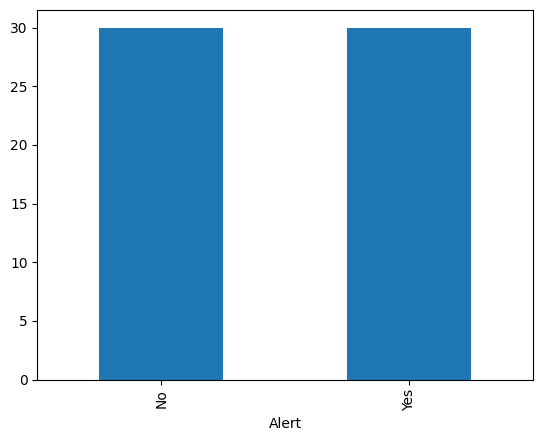

In [ ]:
#Conocemos las variables categóricas
data_etiquetada['Alert'].value_counts().plot(kind='bar')

<Axes: xlabel='outlook'>

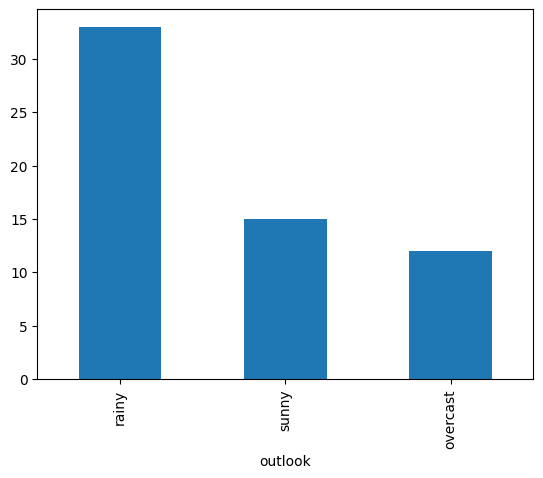

In [ ]:
#Conocemos las variables categóricas
data_etiquetada['outlook'].value_counts().plot(kind='bar')

<Axes: >

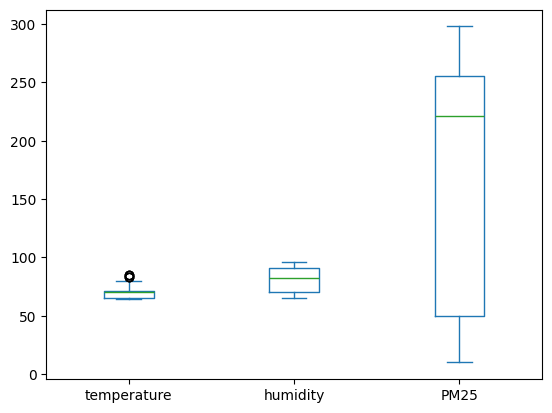

In [ ]:
data_etiquetada.plot(kind='box')

In [ ]:
data_etiquetada.describe()

,temperature,humidity,PM25
count,60.000000,60.000000,60.000000
mean,70.550000,81.100000,176.766667
std,6.020938,10.450367,102.376733
min,64.000000,65.000000,10.000000
25%,65.000000,70.000000,50.000000
50%,70.500000,82.500000,221.500000
75%,71.250000,91.000000,255.750000
max,85.000000,96.000000,298.000000


In [ ]:
# Se crean dummies para las variables categóricas,excepto para la objetivo
data_etiquetada = pd.get_dummies(data_etiquetada, columns=['outlook'], drop_first=False, dtype=int)

data_etiquetada.head()

,temperature,humidity,PM25,Alert,outlook_overcast,outlook_rainy,outlook_sunny
0,65,70,245,Yes,0,1,0
1,71,91,253,Yes,0,1,0
2,65,70,298,Yes,0,1,0
3,71,91,278,Yes,0,1,0
4,65,70,243,Yes,1,0,0


In [ ]:
#Normalizar: temperature	humidity	PM25
#Fit
#Transform


In [ ]:
#Encoder de la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_etiquetada["Alert"] = labelencoder.fit_transform(data_etiquetada["Alert"])
data_etiquetada.head()

,temperature,humidity,PM25,Alert,outlook_overcast,outlook_rainy,outlook_sunny
0,65,70,245,1,0,1,0
1,71,91,253,1,0,1,0
2,65,70,298,1,0,1,0
3,71,91,278,1,0,1,0
4,65,70,243,1,1,0,0


# 1.2 Preparación de Datos NO Etiquetados

In [ ]:
#Cargamos los datos No etiquetados
data_NO_etiquetada = pd.read_excel("prediccionCalidadAire-semisupervisado.xlsx",sheet_name='Datos no etiquetados')
data_NO_etiquetada.head()

,outlook,temperature,humidity,PM25,Alert
0,sunny,85,85,198,-1
1,sunny,80,90,143,-1
2,overcast,83,86,87,-1
3,rainy,70,96,20,-1
4,rainy,68,80,30,-1


In [ ]:
#Conocemos los datos
data_NO_etiquetada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      1932 non-null   object
 1   temperature  1932 non-null   int64 
 2   humidity     1932 non-null   int64 
 3   PM25         1932 non-null   int64 
 4   Alert        1932 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 75.6+ KB


In [ ]:
#Corrección del tipo de datos object a categorías
data_NO_etiquetada['outlook']=data_NO_etiquetada['outlook'].astype('category')
data_NO_etiquetada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   outlook      1932 non-null   category
 1   temperature  1932 non-null   int64   
 2   humidity     1932 non-null   int64   
 3   PM25         1932 non-null   int64   
 4   Alert        1932 non-null   int64   
dtypes: category(1), int64(4)
memory usage: 62.5 KB


<Axes: xlabel='Alert'>

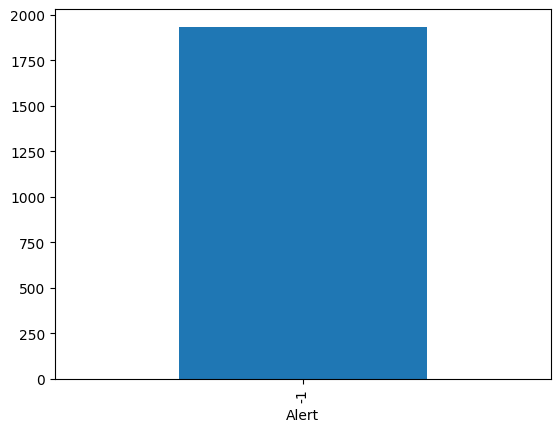

In [ ]:
#Conocemos las variables categóricas
data_NO_etiquetada['Alert'].value_counts().plot(kind='bar')

In [ ]:
# Se crean dummies para las variables categóricas,excepto para la objetivo
data_NO_etiquetada = pd.get_dummies(data_NO_etiquetada, columns=['outlook'], drop_first=False, dtype=int)

data_NO_etiquetada.head()

,temperature,humidity,PM25,Alert,outlook_overcast,outlook_rainy,outlook_sunny
0,85,85,198,-1,0,0,1
1,80,90,143,-1,0,0,1
2,83,86,87,-1,1,0,0
3,70,96,20,-1,0,1,0
4,68,80,30,-1,0,1,0


In [ ]:
#Normalizar: temperature	humidity	PM25

#Transform: data_NO_etiquetada

# 2. División 70-30 de los Datos Etiquetados

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data_etiquetada.drop("Alert", axis = 1) # Variables predictoras
Y = data_etiquetada['Alert'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

#70%
conjunto_entrenamiento=pd.concat([X_train, Y_train], axis=1) #Unificamos en un dataframe el 70% train
conjunto_entrenamiento.head()


,temperature,humidity,PM25,outlook_overcast,outlook_rainy,outlook_sunny,Alert
54,68,80,30,0,1,0,0
45,71,91,284,0,1,0,1
56,64,65,50,1,0,0,0
8,65,70,266,1,0,0,1
27,71,91,244,0,1,0,1


<Axes: xlabel='Alert'>

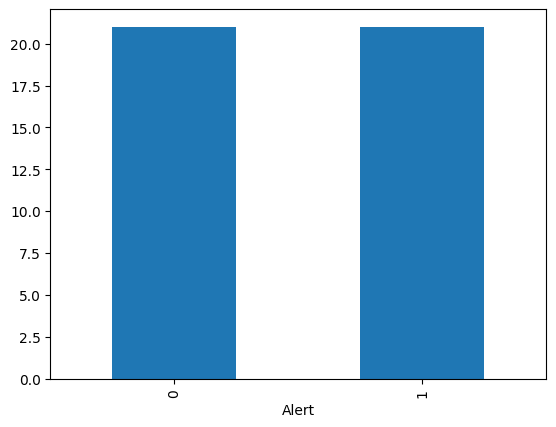

In [ ]:
#Puedes hacer balanceo del conjunto de entrenamiento
conjunto_entrenamiento['Alert'].value_counts().plot(kind='bar')

# 3. Aprendizaje del Modelo: Label Propagation
- Unir los dos conjuntos de datos: conjunto de entrenamiento (70%) y data no etiquetada
- Aplicar el modelo

In [ ]:
#Unimos los dos conjuntos de datos:70% - 100% data no etiquetada
data = pd.concat([conjunto_entrenamiento, data_NO_etiquetada], axis=0)
data

,temperature,humidity,PM25,outlook_overcast,outlook_rainy,outlook_sunny,Alert
54,68,80,30,0,1,0,0
45,71,91,284,0,1,0,1
56,64,65,50,1,0,0,0
8,65,70,266,1,0,0,1
27,71,91,244,0,1,0,1
...,...,...,...,...,...,...,...
1927,75,80,28,0,1,0,-1
1928,75,70,20,0,0,1,-1
1929,72,90,67,1,0,0,-1
1930,81,75,53,1,0,0,-1


<Axes: xlabel='Alert'>

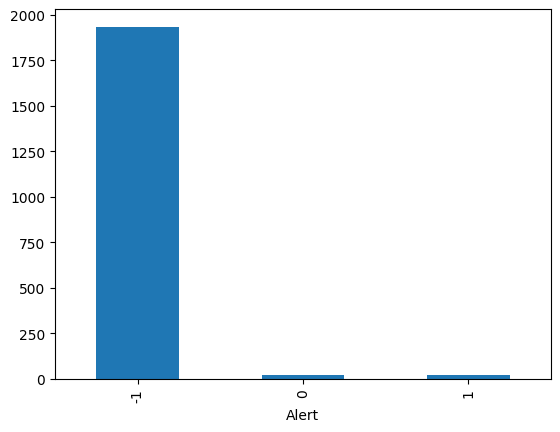

In [ ]:
#Conocemos las variables categóricas
data['Alert'].value_counts().plot(kind='bar')

In [ ]:
#Aplicamos el método Label Propagation: aprendizaje semi-supervisado
from sklearn.semi_supervised import LabelPropagation

var_predictoras= data.drop("Alert", axis = 1) #Predictoras
var_objetivo=data["Alert"] #Objetivo

model = LabelPropagation(kernel='knn', n_neighbors=50)
model.fit(var_predictoras, var_objetivo) #70% train + 100% no etiquetada

LabelPropagation(kernel='knn', n_neighbors=50)

# 4. Evaluación del Modelo sobre el Conjunto de Prueba 30%


In [ ]:
#Evaluación sobre el conjunto de prueba
from sklearn import metrics

Y_pred = model.predict(X_test) #30%

exactitud=metrics.accuracy_score(Y_test, Y_pred)
print(exactitud)


1.0


# 5. Guardamos el modelo para el despliegue

In [ ]:
import pickle
filename = 'modelo-semi.pkl'
variables=X.columns._values
pickle.dump([model,variables,labelencoder], open(filename, 'wb'))

#Guardar el normalizador también